<b><h1>Análise de dado do Inep - IDD</h1></b>

In [2]:
#Imports necessários para o projeto

%matplotlib inline
import pandas as pd

In [4]:
filename = 'dataset/dataset_geral.csv'
df = pd.read_csv(filename, sep=";")

In [5]:
# Mostra as dez primeiras linhas do arquivo lido
df.head(10)

,nu_ano,co_grupo,co_ies,co_categad,co_orgacad,co_munic,co_uf_curso,co_regiao_curso,co_curso,ano_in_grad,...,tp_pres,nt_ger,enem_nt_cn,enem_nt_ch,enem_nt_lc,enem_nt_mt,co_modalidade,IN_REGULAR,TP_INSCRICAO_ADM,ausente da lista 2015
0,2015,22,833,10008,10022,1100023,11.0,1.0,21267,2011,...,555,25.3,583.1,598.3,593,672.1,1.0,NaN,NaN,NaN
1,2015,1,1540,10008,10022,1100023,11.0,1.0,22113,2012,...,555,64.7,552.7,627.1,557.4,434.6,1.0,NaN,NaN,NaN
2,2015,1,833,10008,10022,1100023,11.0,1.0,27377,2012,...,555,32.6,446.6,541.9,484.4,594,1.0,NaN,NaN,NaN
3,2015,2,1540,10008,10022,1100023,11.0,1.0,54688,2011,...,555,56,538.5,621.7,590.4,599.8,1.0,NaN,NaN,NaN
4,2015,18,1540,10008,10022,1100023,11.0,1.0,96110,2011,...,555,38.9,425.5,490,504.7,394.5,1.0,NaN,NaN,NaN
5,2015,18,4613,10005,10022,1100023,11.0,1.0,117508,2011,...,555,48.9,473.4,542.3,594.9,574.5,1.0,NaN,NaN,NaN
6,2015,22,833,10008,10022,1100023,11.0,1.0,21267,2011,...,555,33.2,466.2,572.5,532.8,486,1.0,NaN,NaN,NaN
7,2015,22,833,10008,10022,1100023,11.0,1.0,21267,2012,...,555,44.8,388.7,396.3,456,510.1,1.0,NaN,NaN,NaN
8,2015,22,833,10008,10022,1100023,11.0,1.0,21267,2012,...,555,40.1,505.8,573.4,583.2,486.3,1.0,NaN,NaN,NaN
9,2015,22,833,10008,10022,1100023,11.0,1.0,21267,2012,...,555,31.1,462.2,422.2,487.3,471.2,1.0,NaN,NaN,NaN


In [6]:
#Mostra quantidade de linhas e colunas

df.shape

(795751, 22)

<h2><b>Diferença de notas entre instituições por prova</h2></b>

<h3><b>Ciências da Natureza</b></h3>

<h2><b>Diferença de desempenho entre modalidade de ensino: EAD e Presencial</h2></b>


In [145]:
df['nt_ger']

0         25.3
1         64.7
2         32.6
3           56
4         38.9
          ... 
795746    35,7
795747    38,8
795748    25,7
795749    24,8
795750    41,5
Name: nt_ger, Length: 795751, dtype: object

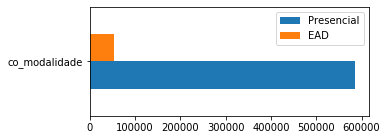

In [138]:
res = df['co_modalidade'].value_counts().to_frame().T.rename(columns={0.0:'EAD',1.0:'Presencial'}).plot(kind='barh', figsize=(5,2))

Observamos a comparação entre as modalidades de cursos: EAD e Presencial.
A modalidade Presencial é quem se destaca, sobre os dados entre os anos 2009 a 2017

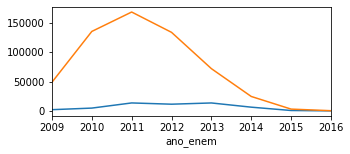

In [166]:
df.loc[df['co_modalidade'] == 0.0].groupby('ano_enem').size().plot(kind='line', figsize=(5,2))
df.loc[df['co_modalidade'] == 1.0].groupby('ano_enem').size().plot(kind='line', figsize=(5,2))

É possivel observar a grandeza de diferença entre as modalidades em função da identificação do ano de Enem selecionado entre as modalidades EAD e Presencial

In [214]:
response = df.loc[df['co_modalidade'] == 0.0]['nt_ger'].replace('.', '')

In [219]:
response = response.replace('.', '')

In [220]:
response.astype(float).mean()

ValueError: could not convert string to float: '39,9'

<h2><b>Comparação: Nota Prova Ciencias Humanas</h2></b>
    

<h2><b>Comparação: Nota Prova Ciencias da Natureza</h2></b>

<h2><b>Comparação: Nota Prova Linguagens e Códigos</h2></b>

<h2><b>Comparação: Nota Prova Matemática</h2></b>

<h2><b>Diferença de desempenho entre Instituto Federal e Faculdade</h2></b>

<h2><b>Medias notas Escolas: Federal, Estadual Municipal, Privada sem funs lucrativos, Privada com fins lucrativos</h2></b>

<h2><b>Diferença Escola Privada com Fins Lucrativos com Estadual</h2></b>